In [ ]:
# Invierto los meses 1 y 2 un monto fijo de $ 5000

# ppm = monto / nominales
# nominales=  monto / ppm

precios = $ 50, $ 100
cantidades = 100 nominales, 50 nominales
precio medio = 75 (Falso)



In [2]:
from statistics import harmonic_mean

In [4]:
harmonic_mean([50,100])

66.66666666666667

In [ ]:
Tengo una cartera con los siguientes P/B

pb = [1.2, 1, 0.9, 0.8]


# Bases de Datos introducción

* Concurrencia
* Relaciones
* Estructura

<img src='imagenes/BBDD.jpeg' width='600'>

Y así sucesivamente se pueden ir creando nuevas entidades que se van relacionando con otras

En este caso vamos a agregar a nuestro modelo de subyacentes y derivados, una entidad de "fondos" que podrian ser FCIs y "clientes" que podrian ser las cuentas de un Alyc

<img src='imagenes/BBDD2.jpeg' width='600'>

# XAMPP

## Configuracion Apache y puerto http

Configuraciones Iniciales, no necesariamente pero si al darrle "start" al Apache aparece un conflicto de puertos, hay que configurar un puerto diferente al 80 que es el default

<img src='imagenes/xampp_1.png' width=750>

<img src='imagenes/xampp_2.png' width=750>

<img src='imagenes/xampp_3.png' width=750>

## Configuracion MySQL y puerto de BBDD

<img src='imagenes/xampp_4.png' width=750>

<img src='imagenes/xampp_5.png' width=750>

## Configuracion general  XAMMP

<img src='imagenes/xampp_6.png' width=800>

<img src='imagenes/xampp_7.png' width='600'>

<img src='imagenes/xampp_8.png'  width='600'>

# Crear Base de datos

<img src='imagenes/xampp_9.png'  width='700'>

# API FMP

In [2]:
apikey = '66c44b016256f8b9e507838f32434ece'
apikey = '7bcec62b64a5ccd1f35fc2036c768593'
apikey = '2f08561fe33be29429d696aed288539e'
apikey = '938c4b4dece598e20a115db9b9d3d5e9'
apikey = 'f0bdfc9adbb9cad589dadedfd786d499'

In [3]:
import requests
import pandas as pd

## Paneles precios RealTime

In [3]:
paneles = ['etf','commodity','euronext','nyse','amex','nasdaq','tsx','index','mutual_fund']

In [4]:
def getPanel(exchange):
    url = 'https://fmpcloud.io/api/v3/quotes/'+exchange
    p = {'apikey': apikey}
    r = requests.get(url, params = p)
    js = r.json()
    df = pd.DataFrame(js)
    df.set_index('symbol', inplace=True)
    return df

In [5]:
paneles_px = {}
for panel in paneles:
    print(panel, end=', ')
    paneles_px[panel] = getPanel(panel)

etf, commodity, euronext, nyse, amex, nasdaq, tsx, index, mutual_fund, 

In [10]:
print(paneles_px['nasdaq'].columns, paneles_px['nasdaq']['price'])

Index(['name', 'price', 'changesPercentage', 'change', 'dayLow', 'dayHigh',
       'yearHigh', 'yearLow', 'marketCap', 'priceAvg50', 'priceAvg200',
       'volume', 'avgVolume', 'exchange', 'open', 'previousClose', 'eps', 'pe',
       'earningsAnnouncement', 'sharesOutstanding', 'timestamp'],
      dtype='object') symbol
MMDM       1.3200
WRLD     107.6100
DWAQ     137.0600
THCBU     10.4248
GOGO      10.9700
           ...   
TBKCP     25.8500
PSTVZ      0.0070
NUROW      0.1420
TSLA     439.6700
SLM        9.4100
Name: price, Length: 4203, dtype: float64


In [11]:
accion = paneles_px['nasdaq'].loc['MELI']
accion

name                              MercadoLibre, Inc.
price                                        1271.38
changesPercentage                               1.07
change                                         13.49
dayLow                                       1258.05
dayHigh                                         1280
yearHigh                                     1283.96
yearLow                                       422.22
marketCap                                6.32003e+10
priceAvg50                                   1103.97
priceAvg200                                  932.238
volume                                        359501
avgVolume                                     518238
exchange                                      NASDAQ
open                                         1269.89
previousClose                                1257.89
eps                                           -3.405
pe                                               NaN
earningsAnnouncement    2020-11-04T21:00:00.00

<AxesSubplot:ylabel='Density'>

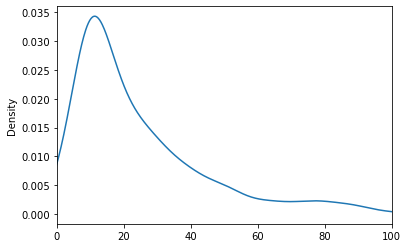

In [17]:
nasdaq = paneles_px['nasdaq']
nasdaq.loc[(nasdaq.pe>0) & (nasdaq.pe<100)].pe.plot(kind='kde', xlim=(0,100))

In [18]:
nasdaq.loc[(nasdaq.pe>80) & (nasdaq.pe<100)]

,name,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,marketCap,priceAvg50,...,volume,avgVolume,exchange,open,previousClose,eps,pe,earningsAnnouncement,sharesOutstanding,timestamp
symbol,,,,,,,,,,,,,,,,,,,,,
ISRG,"Intuitive Surgical, Inc.",752.68,1.58,11.68,716.4700,760.8826,778.83,360.500,8.808313e+10,709.220600,...,907898.0,628081.0,NASDAQ,725.00,741.00,8.778,85.746185,2020-10-15T16:05:10.000+0000,1.170260e+08,1602887014
LULU,Lululemon Athletica Inc.,349.95,-1.04,-3.66,348.2900,358.2400,399.90,128.850,4.560304e+10,337.251430,...,828974.0,1820547.0,NASDAQ,356.15,353.61,4.122,84.898110,2020-09-08T16:05:00.000+0000,1.303130e+08,1602887014
STRS,Stratus Properties Inc.,23.01,-0.90,-0.21,22.9000,23.3750,32.22,12.000,1.889153e+08,21.602571,...,3759.0,8610.0,NASDAQ,22.90,23.22,0.259,88.841700,2020-11-09T11:00:00.000+0000,8.210140e+06,1602887014
FSV,FirstService Corporation,135.19,-0.52,-0.70,133.9800,137.6350,138.86,57.380,5.917780e+09,129.793720,...,25811.0,63527.0,NASDAQ,136.64,135.89,1.395,96.910400,None,4.377380e+07,1602887014
LSCC,Lattice Semiconductor Corporation,33.56,-0.83,-0.28,33.3300,34.0900,35.16,13.540,4.540970e+09,29.373428,...,601152.0,1085984.0,NASDAQ,33.93,33.84,0.339,98.997055,2020-10-27T20:00:00.000+0000,1.353090e+08,1602887014
TTGT,"TechTarget, Inc.",49.56,-0.12,-0.06,49.1101,50.4200,51.18,16.820,1.364724e+09,43.049427,...,89170.0,282741.0,NASDAQ,49.40,49.62,0.588,84.285710,2020-11-04T21:00:00.000+0000,2.753680e+07,1602887014
CGNX,Cognex Corporation,68.88,2.48,1.67,68.0881,69.5925,71.76,35.200,1.191948e+10,65.221430,...,653353.0,769713.0,NASDAQ,68.57,67.21,0.800,86.100000,2020-10-28T20:00:00.000+0000,1.730470e+08,1602887014
MITK,"Mitek Systems, Inc.",12.90,1.65,0.21,12.4700,13.0533,14.50,5.260,5.326178e+08,12.642858,...,1514124.0,524650.0,NASDAQ,12.73,12.69,0.145,88.965515,2020-07-30T16:30:00.000+0000,4.128820e+07,1602887014
NFLX,"Netflix, Inc.",530.79,-2.06,-11.15,530.0300,554.3300,575.37,265.800,2.340864e+11,509.331730,...,6063680.0,6574067.0,NASDAQ,549.50,541.94,5.922,89.630190,2020-10-20T23:00:00.000+0000,4.410150e+08,1602887014


## Screeners (ponele)

In [4]:
def screenMktCapHigh(minMktCap= 10**10):
    url = 'https://fmpcloud.io/api/v3/stock-screener'
    p = {'apikey': apikey, 'marketCapMoreThan':minMktCap }
    r = requests.get(url, params = p)
    js = r.json()
    df = pd.DataFrame(js)
    return df

In [5]:
%%time
data = screenMktCapHigh(minMktCap=10**10).drop('companyName', axis=1)
data

Wall time: 1.35 s


,symbol,marketCap,sector,industry,beta,price,lastAnnualDividend,volume,exchange,exchangeShortName
0,SBER.ME,4.534760e+12,Banking,Banks,1.544100,210.070,18.7000,56583594,MCX,EURONEXT
1,GAZP.ME,3.876834e+12,Energy,Energy,1.319190,163.960,15.2400,37229296,MCX,EURONEXT
2,GMKN.ME,3.125972e+12,Metals & Mining,Materials,0.681280,19754.000,1161.2900,276943,MCX,EURONEXT
3,LKOH.ME,2.743106e+12,Energy,Energy,1.027080,4204.000,542.0000,1031446,MCX,EURONEXT
4,AAPL,2.003216e+12,Technology,Consumer Electronics,1.339240,117.130,0.7825,174072926,Nasdaq Global Select,NASDAQ
...,...,...,...,...,...,...,...,...,...,...
1153,CTW,1.007537e+10,,,-0.035657,25.320,1.8750,20026,New York Stock Exchange,NYSE
1154,XRAY,1.007267e+10,Healthcare,Medical Instruments & Supplies,0.897130,46.100,0.4000,1353226,Nasdaq Global Select,NASDAQ
1155,WSP.TO,1.002157e+10,Industrials,Engineering & Construction,0.976340,88.710,1.5000,159906,Toronto,TSX
1156,BFAM,1.001853e+10,Consumer Cyclical,Personal Services,0.863060,165.845,0.0000,537853,New York Stock Exchange,NYSE


# Manejo de directorios (Básico)

In [8]:
import os

In [9]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders'

In [29]:
os.mkdir('dir_nuevo2')

In [10]:
# os.mkdir('Persistencia')
os.chdir('Persistencia')

In [11]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia'

In [12]:
scan = os.scandir()
for elemento in scan:
    if elemento.is_dir():
        print(elemento.name)

excels_sp500


In [13]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia'

In [14]:
scan = os.scandir()
for elemento in scan:
    if elemento.is_file():
        print(elemento.name, elemento.stat().st_size//1024)

aqui_no_hay_nada_archivo_test.txt 0
df_sp500.db 277284
df_sp500.xlsx 51198
fmp.csv 119
fmp.db 168
fmp.json 216
fmp.ujson 193
fmp.xlsx 84


# Persistencia en MySQL

In [62]:
#!pip install PyMySQL
from sqlalchemy import create_engine

#Seteo el USER : PASS @ HOST / BBDD_NAME
sql_engine = create_engine('mysql+pymysql://root:@localhost/curso_2_clase_6')
sql_conn = sql_engine.connect()

In [6]:
%%timeit
data.to_sql(con=sql_conn, name='fmp_2', if_exists='replace')

172 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Persistencia en SQLite

In [17]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia'

In [18]:
from sqlalchemy import create_engine

sqlite_engine = create_engine('sqlite:///fmp.db', echo=False)
sqlite_conn = sqlite_engine.connect()

In [19]:
%%timeit
data.to_sql(con=sqlite_conn, name='fmp', if_exists='replace')

56.4 ms ± 4.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Lectura desde MySQL

In [11]:
%%timeit
pd.read_sql('fmp_2', con=sql_conn)

73 ms ± 9.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
lectura_total = pd.read_sql('fmp_2', con=sql_conn)
lectura_total

,index,symbol,marketCap,sector,industry,beta,price,lastAnnualDividend,volume,exchange,exchangeShortName
0,0,SBER.ME,4.534760e+12,Banking,Banks,1.544100,210.070,18.7000,56583594,MCX,EURONEXT
1,1,GAZP.ME,3.876834e+12,Energy,Energy,1.319190,163.960,15.2400,37229296,MCX,EURONEXT
2,2,GMKN.ME,3.125972e+12,Metals & Mining,Materials,0.681280,19754.000,1161.2900,276943,MCX,EURONEXT
3,3,LKOH.ME,2.743106e+12,Energy,Energy,1.027080,4204.000,542.0000,1031446,MCX,EURONEXT
4,4,AAPL,2.003216e+12,Technology,Consumer Electronics,1.339240,117.130,0.7825,174072926,Nasdaq Global Select,NASDAQ
...,...,...,...,...,...,...,...,...,...,...,...
1153,1153,CTW,1.007537e+10,,,-0.035657,25.320,1.8750,20026,New York Stock Exchange,NYSE
1154,1154,XRAY,1.007267e+10,Healthcare,Medical Instruments & Supplies,0.897130,46.100,0.4000,1353226,Nasdaq Global Select,NASDAQ
1155,1155,WSP.TO,1.002157e+10,Industrials,Engineering & Construction,0.976340,88.710,1.5000,159906,Toronto,TSX
1156,1156,BFAM,1.001853e+10,Consumer Cyclical,Personal Services,0.863060,165.845,0.0000,537853,New York Stock Exchange,NYSE


In [14]:
%%timeit
conteo = pd.read_sql('SELECT COUNT(*) FROM fmp_2', con=sql_conn)

7.71 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# Si tengo 1000 reg y quiero del 5 al 10 en SQL
#  LIMIT 5,5

# iloc[desde : hasta]
# LIMIT cuantos, desde

In [26]:
query = 'SELECT * FROM fmp_2 \
            WHERE beta < 1  \
            ORDER BY marketCap ASC \
            LIMIT 5,10'
filtro = pd.read_sql(query, con=sql_conn)
filtro

,index,symbol,marketCap,sector,industry,beta,price,lastAnnualDividend,volume,exchange,exchangeShortName
0,1147,EMP-A.TO,1.021807e+10,Consumer Defensive,Grocery Stores,0.232220,37.9700,0.490000,519308,Toronto,TSX
1,1145,IWS,1.022963e+10,,,0.000000,84.9990,1.980000,466284,NYSE Arca,NYSE
2,1144,CPL,1.025804e+10,Utilities,Utilities Regulated,0.517293,17.3600,0.236747,172515,New York Stock Exchange,NYSE
3,1143,IHG,1.029653e+10,Consumer Cyclical,Lodging,0.837489,55.5000,1.258000,220080,New York Stock Exchange,NYSE
4,1142,IFF.PA,1.032260e+10,Basic Materials,Specialty Chemicals,0.930050,124.0000,2.980000,0,Paris,EURONEXT
5,1141,SPLV,1.035077e+10,,,0.000000,54.6267,1.206000,2731910,NYSE Arca,NYSE
6,1140,ARGX.BR,1.035445e+10,Healthcare,Biotechnology,0.684300,219.8000,0.000000,132879,Brussels,EURONEXT
7,1138,XLU,1.042994e+10,,,0.000000,63.8800,1.943000,13114507,NYSE Arca,NYSE
8,1135,WTRG,1.044728e+10,Utilities,Utilities Regulated Water,0.444850,42.6150,0.937200,1152858,NYSE,NYSE
9,1134,IWO,1.045763e+10,,,0.000000,233.6900,1.519000,375850,NYSE Arca,NYSE


## Consultas agregacion

In [29]:
%%timeit
query = 'SELECT sector, AVG(beta) as promedio_betas, VARIANCE(beta) as varianza_betas \
            FROM fmp_2 \
            GROUP BY sector \
            ORDER BY promedio_betas DESC'

res = pd.read_sql(query, con=sql_conn)
res

13.9 ms ± 864 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
res

,sector,promedio_betas,varianza_betas
0,Banking,1.544100,0.000000
1,Energy,1.443595,0.540721
2,Consumer Cyclical,1.206074,0.392266
3,Industrials,1.060473,0.135675
4,Financial Services,1.044847,0.216867
5,Technology,1.024093,0.278884
6,Airlines,0.993200,0.000000
7,Basic Materials,0.960849,0.299575
8,Healthcare,0.854639,0.242750
9,Real Estate,0.801181,0.201696


In [36]:
query = 'SELECT * FROM fmp_2'

tabla_total = pd.read_sql(query, con=sql_conn)
tabla_total.groupby('sector').var().beta.sort_values(ascending=False).to_frame()

,beta
sector,
Energy,0.564138
Consumer Cyclical,0.396624
Basic Materials,0.305123
Technology,0.280707
Communication Services,0.267280
Healthcare,0.244807
Financial Services,0.218313
Real Estate,0.207999
Industrials,0.136943


In [37]:
data

,symbol,marketCap,sector,industry,beta,price,lastAnnualDividend,volume,exchange,exchangeShortName
0,SBER.ME,4.534760e+12,Banking,Banks,1.544100,210.070,18.7000,56583594,MCX,EURONEXT
1,GAZP.ME,3.876834e+12,Energy,Energy,1.319190,163.960,15.2400,37229296,MCX,EURONEXT
2,GMKN.ME,3.125972e+12,Metals & Mining,Materials,0.681280,19754.000,1161.2900,276943,MCX,EURONEXT
3,LKOH.ME,2.743106e+12,Energy,Energy,1.027080,4204.000,542.0000,1031446,MCX,EURONEXT
4,AAPL,2.003216e+12,Technology,Consumer Electronics,1.339240,117.130,0.7825,174072926,Nasdaq Global Select,NASDAQ
...,...,...,...,...,...,...,...,...,...,...
1153,CTW,1.007537e+10,,,-0.035657,25.320,1.8750,20026,New York Stock Exchange,NYSE
1154,XRAY,1.007267e+10,Healthcare,Medical Instruments & Supplies,0.897130,46.100,0.4000,1353226,Nasdaq Global Select,NASDAQ
1155,WSP.TO,1.002157e+10,Industrials,Engineering & Construction,0.976340,88.710,1.5000,159906,Toronto,TSX
1156,BFAM,1.001853e+10,Consumer Cyclical,Personal Services,0.863060,165.845,0.0000,537853,New York Stock Exchange,NYSE


# Persistencia en Archivos

In [38]:
%%timeit
data.to_excel('fmp.xlsx')

415 ms ± 68.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%%timeit
data.to_csv('fmp.csv')

19 ms ± 3.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
import json

js = data.to_dict()

In [47]:
%%timeit
with open('fmp.json', 'w') as f:
    json.dump(js, f)

98.4 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
import ujson

In [49]:
%%timeit
with open('fmp.ujson', 'w') as f:
    ujson.dump(js, f)

8.99 ms ± 546 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Serializado

In [50]:
import pickle

In [57]:
%%timeit
with open('fmp_df.pickle', 'wb') as f:
    pickle.dump(data, f)

3.11 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [55]:
%%timeit
with open('fmp_js.pickle', 'wb') as f:
    pickle.dump(js, f)

3.7 ms ± 572 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Compresion de archivos en disco

In [26]:
import zipfile

In [42]:
%%timeit
zipfile.ZipFile('fmp_excel.zip','w').write('fmp.xlsx', compress_type = zipfile.ZIP_BZIP2)

15.8 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
%%timeit
zipfile.ZipFile('fmp_csv.zip','w').write('fmp.csv', compress_type = zipfile.ZIP_BZIP2)

12.1 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
%%timeit
zipfile.ZipFile('fmp_json.zip','w').write('fmp.json', compress_type = zipfile.ZIP_BZIP2)

20.2 ms ± 499 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%%timeit
zipfile.ZipFile('fmp_ujson.zip','w').write('fmp.ujson', compress_type = zipfile.ZIP_BZIP2)

17 ms ± 401 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# ZIP_BZIP2 = + tiempo + compresion
# ZIP_DEFLATED = - tiempo - compresion

# Descompresion de archivos

In [63]:
zip_excel = zipfile.ZipFile('fmp_excel.zip','r')
zip_excel.extractall()

In [62]:
%%timeit
zipfile.ZipFile('fmp_excel.zip','r').extractall()

7.11 ms ± 230 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
%%timeit
zipfile.ZipFile('fmp_csv.zip','r').extractall()

5.63 ms ± 49.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
%%timeit
zipfile.ZipFile('fmp_json.zip','r').extractall()

8.34 ms ± 654 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%%timeit
zipfile.ZipFile('fmp_ujson.zip','r').extractall()

7.6 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Persistencia con tablas "grandes"

In [58]:
import yfinance as yf
import pandas as pd

In [59]:
%%time
sp500_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = list(sp500_wiki.Symbol)
sp500_tickers = [t for t in sp500_tickers if t not in ['BRK.B' ,'BF.B']]

Wall time: 3.86 s


In [63]:
# ya que estamos
pd.DataFrame(sp500_tickers).to_sql(con=sql_conn, name='sp500tickers', if_exists='replace')

In [6]:
# ya que estamos
pd.DataFrame(sp500_tickers).to_sql(con=sqlite_conn, name='sp500tickers', if_exists='replace')

In [64]:
# %%timeit
ticks = pd.read_sql('sp500tickers', sql_conn)
ticks

,index,0
0,0,MMM
1,1,ABT
2,2,ABBV
3,3,ABMD
4,4,ACN
...,...,...
498,498,YUM
499,499,ZBRA
500,500,ZBH
501,501,ZION


In [8]:
%%timeit
pd.read_sql('sp500tickers', sqlite_conn)

5.56 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [80]:
def getDataM(listado, start='2000-01-01', interval='1d', end=None):
    data = yf.download(listado, start=start, end=end, interval=interval, auto_adjust=True)
    return data.swaplevel(i=1, j=0, axis=1)

In [81]:
df_sp500 = getDataM(sp500_tickers, start='2012-01-01')

[*********************100%***********************]  503 of 503 completed


## Preparamos la data

In [75]:
import tqdm, sys, os

In [82]:
tablas = []
with tqdm.tqdm(total=len(sp500_tickers), file=sys.stdout) as pbar:
    for ticker in sp500_tickers:
        pbar.update()
        tabla = df_sp500[ticker].copy()
        tabla['ticker'] = ticker
        tabla['variacion'] = tabla.Close.pct_change() *100
        tabla['volatilidad'] = tabla.variacion.rolling(250).std() * 250**0.5
        tabla['vol_mln'] = tabla.Volume * tabla.Close / 1000000
        tabla = tabla.dropna().round(2)
        tablas.append(tabla)

tabla_full = pd.concat(tablas)        
tabla_full

100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:08<00:00, 56.22it/s]


,Close,High,Low,Open,Volume,ticker,variacion,volatilidad,vol_mln
Date,,,,,,,,,
2012-12-31,75.33,75.39,74.15,74.27,2580600.0,MMM,1.17,14.14,194.39
2013-01-02,76.89,76.90,76.23,76.42,3206700.0,MMM,2.08,14.26,246.58
2013-01-03,76.81,77.02,76.37,76.54,2704600.0,MMM,-0.12,14.25,207.73
2013-01-04,77.37,77.46,76.70,76.90,2704900.0,MMM,0.74,14.25,209.29
2013-01-07,77.47,77.67,76.88,77.09,2745800.0,MMM,0.13,14.24,212.72
...,...,...,...,...,...,...,...,...,...
2020-10-12,168.55,168.96,166.19,167.08,1582300.0,ZTS,1.89,38.37,266.70
2020-10-13,165.32,168.06,165.31,167.84,1515800.0,ZTS,-1.92,38.42,250.59
2020-10-14,163.66,166.70,162.79,166.54,1319500.0,ZTS,-1.00,38.44,215.95


## A excel de una

In [13]:
%%time
tabla_full.to_excel('df_sp500.xlsx')

Wall time: 3min 27s


In [86]:
%%timeit
with open('pickle_great.dat', 'wb') as f:
    pickle.dump(tabla_full, f)

186 ms ± 5.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## A Excel en archivitos

In [16]:
#os.mkdir('excels_sp500')
os.chdir('Persistencia\\excels_sp500')

In [19]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia\\excels_sp500'

In [20]:
%%time
with tqdm.tqdm(total=len(sp500_tickers), file=sys.stdout) as pbar:
    for ticker in sp500_tickers:
        pbar.update()
        tabla = df_sp500[ticker].copy()
        tabla['ticker'] = ticker
        tabla['variacion'] = tabla.Close.pct_change()
        tabla['volatilidad'] = tabla.variacion.rolling(250).std() * 250**0.5
        tabla['vol_mln'] = tabla.Volume * tabla.Close / 1000000
        tabla = tabla.dropna().round(2)
        tabla.to_excel(ticker+'.xlsx') 

100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [03:51<00:00,  2.17it/s]
Wall time: 3min 51s


In [21]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia\\excels_sp500'

In [22]:
os.chdir('..')

In [23]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia'

## A SQLite por tablas

In [50]:
sqlite_engine = create_engine('sqlite:///df_sp500.db', echo=False)
sqlite_conn = sqlite_engine.connect()

In [51]:
with tqdm.tqdm(total=len(sp500_tickers), file=sys.stdout) as pbar:
    for ticker in sp500_tickers:
        pbar.update()
        tabla_full.loc[tabla_full.ticker == ticker].to_sql(con=sqlite_conn, name=ticker, if_exists='replace')

100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [01:12<00:00,  6.98it/s]


## A SQLite entera

In [53]:
%%time
tabla_full.to_sql(con=sqlite_conn, name='sp500', if_exists='replace')

Wall time: 60 s


## A mySQL por tablas

In [54]:
with tqdm.tqdm(total=len(sp500_tickers), file=sys.stdout) as pbar:
    for ticker in sp500_tickers:
        pbar.update()
        tabla_full.loc[tabla_full.ticker == ticker].to_sql(con=sql_conn, name=ticker.lower(), if_exists='replace')

100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [03:36<00:00,  2.32it/s]


## A MySQL entera

In [55]:
%%time
tabla_full.to_sql(con=sql_conn, name='sp500', if_exists='replace')

Wall time: 1min 40s


# Lectura de datos guardados

## Lectura desde Excel o Tablas x Activo

### Excel

In [56]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia'

In [57]:
os.chdir('excels_sp500')

In [58]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia\\excels_sp500'

In [59]:
%%timeit
pd.read_excel('AAPL.xlsx')

298 ms ± 43.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### SQL

In [60]:
%%timeit
pd.read_sql('aapl', con=sql_conn)

100 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### SQLite

In [61]:
%%timeit
pd.read_sql('AAPL', con=sqlite_conn)

28.5 ms ± 413 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Lectura completa desde MySQL

In [62]:
%%timeit
pd.read_sql('sp500', con=sql_conn)

33.2 s ± 4.39 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Lectura completa desde SQLite

In [63]:
%%timeit
pd.read_sql('sp500', con=sqlite_conn)

9.37 s ± 889 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Lectura completa desde Excel

In [64]:
os.chdir('..')
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia'

In [65]:
%%time
pd.read_excel('df_sp500.xlsx')

Wall time: 2min 9s


,Date,Close,High,Low,Open,Volume,ticker,variacion,volatilidad,vol_mln,Adj Close
0,2012-12-31,75.33,75.39,74.15,74.27,2580600,MMM,1.17,14.14,194.39,NaN
1,2013-01-02,76.89,76.90,76.23,76.42,3206700,MMM,2.08,14.26,246.58,NaN
2,2013-01-03,76.81,77.02,76.37,76.54,2704600,MMM,-0.12,14.25,207.73,NaN
3,2013-01-04,77.37,77.46,76.70,76.90,2704900,MMM,0.74,14.25,209.29,NaN
4,2013-01-07,77.47,77.67,76.88,77.09,2745800,MMM,0.13,14.24,212.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...
943572,2020-10-12,168.55,168.96,166.19,167.08,1582300,ZTS,1.89,38.37,266.70,NaN
943573,2020-10-13,165.32,168.06,165.31,167.84,1515800,ZTS,-1.92,38.42,250.59,NaN
943574,2020-10-14,163.66,166.70,162.79,166.54,1319500,ZTS,-1.00,38.44,215.95,NaN
943575,2020-10-15,162.99,163.23,161.21,162.05,1363800,ZTS,-0.41,38.44,222.29,NaN
